<a href="https://colab.research.google.com/github/smiling621/PRODIGY_DS_04/blob/main/PRODIGY_DS_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install --upgrade tensorflow keras


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 MB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 17.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 19.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 19.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 19.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 347.7/347.7 kB 21.6 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.2.0
    Uninstalling ml-dtypes-0.2.0:
      Successfully uninstalled ml-dtypes-0.2.0
  Attempting uninstall: h5py
    Found existing installation: h5py 3.9.0
    Uninstalling h5py-3.9.0:
      Successfully uninstalled h5py-3.9.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.15.2
    Uninstalling tensorboard-2.15.2:
      Successfully uninstalled tensorboard-2.15.2
  Attempting uninstall: keras
    Fo

In [41]:
from sklearn.feature_extraction.text import CountVectorizer
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
df = pd.read_csv('/content/sentimentdataset.csv')

In [18]:
df.head()

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0.1  732 non-null    int64  
 1   Unnamed: 0    732 non-null    int64  
 2   Text          732 non-null    object 
 3   Sentiment     732 non-null    object 
 4   Timestamp     732 non-null    object 
 5   User          732 non-null    object 
 6   Platform      732 non-null    object 
 7   Hashtags      732 non-null    object 
 8   Retweets      732 non-null    float64
 9   Likes         732 non-null    float64
 10  Country       732 non-null    object 
 11  Year          732 non-null    int64  
 12  Month         732 non-null    int64  
 13  Day           732 non-null    int64  
 14  Hour          732 non-null    int64  
dtypes: float64(2), int64(6), object(7)
memory usage: 85.9+ KB


In [12]:
df.describe()

,Unnamed: 0.1,Unnamed: 0,Retweets,Likes,Year,Month,Day,Hour
count,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000
mean,366.464481,369.740437,21.508197,42.901639,2020.471311,6.122951,15.497268,15.521858
std,211.513936,212.428936,7.061286,14.089848,2.802285,3.411763,8.474553,4.113414
min,0.000000,0.000000,5.000000,10.000000,2010.000000,1.000000,1.000000,0.000000
25%,183.750000,185.750000,17.750000,34.750000,2019.000000,3.000000,9.000000,13.000000
50%,366.500000,370.500000,22.000000,43.000000,2021.000000,6.000000,15.000000,16.000000
75%,549.250000,553.250000,25.000000,50.000000,2023.000000,9.000000,22.000000,19.000000
max,732.000000,736.000000,40.000000,80.000000,2023.000000,12.000000,31.000000,23.000000


In [14]:
df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Text', 'Sentiment', 'Timestamp', 'User',
       'Platform', 'Hashtags', 'Retweets', 'Likes', 'Country', 'Year', 'Month',
       'Day', 'Hour'],
      dtype='object')

In [15]:
df.isnull().sum()

Unnamed: 0.1    0
Unnamed: 0      0
Text            0
Sentiment       0
Timestamp       0
User            0
Platform        0
Hashtags        0
Retweets        0
Likes           0
Country         0
Year            0
Month           0
Day             0
Hour            0
dtype: int64

In [16]:

df.dropna(axis=0 , inplace=True)

In [17]:

df.isnull().sum()

Unnamed: 0.1    0
Unnamed: 0      0
Text            0
Sentiment       0
Timestamp       0
User            0
Platform        0
Hashtags        0
Retweets        0
Likes           0
Country         0
Year            0
Month           0
Day             0
Hour            0
dtype: int64

In [23]:
#tokenize the text
tokenizer = Tokenizer(num_words=2000, split=' ')
tokenizer.fit_on_texts(df['Sentiment'].values)
X = tokenizer.texts_to_sequences(df['Sentiment'].values)
X = pad_sequences(X)

In [19]:
sentiment_counts = df['Sentiment'].value_counts()
sentiment_counts

Sentiment
 Positive           44
 Joy                42
 Excitement         32
 Neutral            14
 Contentment        14
                    ..
 Adrenaline          1
 Harmony             1
 ArtisticBurst       1
 Radiance            1
 Elegance            1
Name: count, Length: 279, dtype: int64

In [26]:
#dic of sentiment
dict(df['Sentiment'].value_counts())


{' Positive  ': 44,
 ' Joy ': 42,
 ' Excitement ': 32,
 ' Neutral ': 14,
 ' Contentment ': 14,
 ' Happy ': 14,
 ' Hopeful ': 9,
 ' Sad ': 9,
 ' Gratitude ': 9,
 ' Curiosity ': 8,
 ' Embarrassed ': 8,
 ' Loneliness ': 7,
 ' Elation       ': 6,
 ' Bad ': 6,
 ' Despair ': 6,
 ' Hate ': 6,
 ' Playful ': 6,
 ' Gratitude     ': 5,
 ' Curiosity       ': 5,
 ' Enthusiasm    ': 5,
 ' Inspired ': 5,
 ' Empowerment   ': 5,
 ' Contentment   ': 5,
 ' Serenity        ': 5,
 ' Determination   ': 5,
 ' Acceptance      ': 5,
 ' Ambivalence     ': 5,
 ' Nostalgia       ': 5,
 ' Melancholy      ': 5,
 ' Numbness        ': 5,
 ' Confusion       ': 5,
 ' Serenity      ': 5,
 ' Indifference    ': 5,
 ' Frustrated ': 5,
 ' Bitterness ': 5,
 ' Euphoria      ': 4,
 ' Grief ': 4,
 ' Betrayal ': 4,
 ' Frustration ': 4,
 ' Nostalgia ': 4,
 ' Awe ': 4,
 ' Inspiration ': 4,
 ' Negative  ': 4,
 ' Proud ': 4,
 ' Grateful ': 4,
 ' Compassionate ': 4,
 ' Desolation ': 4,
 ' Hope          ': 4,
 ' Neutral   ': 4,
 ' Exc

In [29]:
#encoding the categorical targeted values
X=df['Text']
y=df['Sentiment']
Y = pd.get_dummies(df['Sentiment']).values
Y

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [34]:
#tokenizing pad and sequence
tokenizer = Tokenizer(num_words=2000, split=' ')
tokenizer.fit_on_texts(X.values)
X = tokenizer.texts_to_sequences(X.values)
X = pad_sequences(X)
X


array([[   0,    0,    0, ...,   12,    1,  463],
       [   0,    0,    0, ..., 1135,  130,  342],
       [   0,    0,    0, ..., 1136,  256,  464],
       ...,
       [   0,    0,    0, ...,    5,    1,   91],
       [   0,    0,    0, ...,    6, 1036, 1040],
       [   0,    0,    0, ...,  407,    5,  649]], dtype=int32)

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [37]:
max_words = 2000  # num_words used in Tokenizer
embedding_dim = 128
max_sequence_length = X.shape[1]

In [38]:
from keras.layers import Embedding, LSTM, Dense

In [39]:
#defining the model
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_sequence_length))
model.add(LSTM(128))
model.add(Dense(Y.shape[1], activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [40]:
#training the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X, Y, batch_size=32, epochs=10, validation_split=0.2)

Epoch 1/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 5s 68ms/step - accuracy: 0.0363 - loss: 5.6183 - val_accuracy: 0.0000e+00 - val_loss: 5.6585
Epoch 2/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.0718 - loss: 5.4193 - val_accuracy: 0.0136 - val_loss: 5.6552
Epoch 3/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.0758 - loss: 5.3011 - val_accuracy: 0.0000e+00 - val_loss: 5.9289
Epoch 4/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.0746 - loss: 5.1384 - val_accuracy: 0.0000e+00 - val_loss: 6.0772
Epoch 5/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.1139 - loss: 4.8951 - val_accuracy: 0.0068 - val_loss: 6.1301
Epoch 6/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.0942 - loss: 4.8031 - val_accuracy: 0.0680 - val_loss: 6.3662
Epoch 7/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 95ms/step - accuracy: 0.0999 - loss: 4.5977 - val_accuracy: 0.0136 - val_loss: 6.4739
Epoch 8/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - accuracy: 0.1114 - loss: 4.3909 - val_accuracy

In [44]:

sentiment_counts = {'Positive': 300, 'Neutral': 200, 'Negative': 150}
df_sentiments = pd.DataFrame(list(sentiment_counts.items()), columns=['Sentiment', 'Count'])
df_sentiments


,Sentiment,Count
0,Positive,300
1,Neutral,200
2,Negative,150


<ipython-input-46-94010e730b41>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_sentiments.index, y=df_sentiments['Count'], palette='viridis')


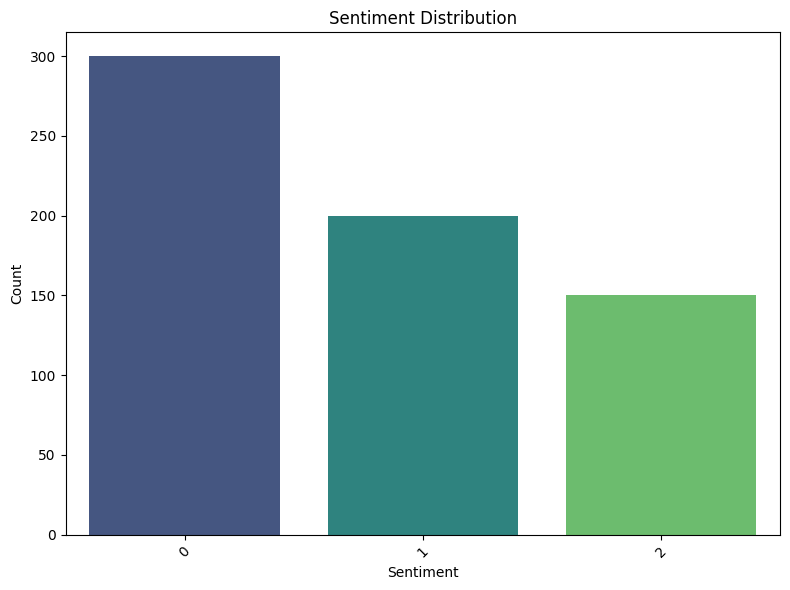

In [46]:
#bar-graph of sentiment
plt.figure(figsize=(8, 6))
sns.barplot(x=df_sentiments.index, y=df_sentiments['Count'], palette='viridis')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

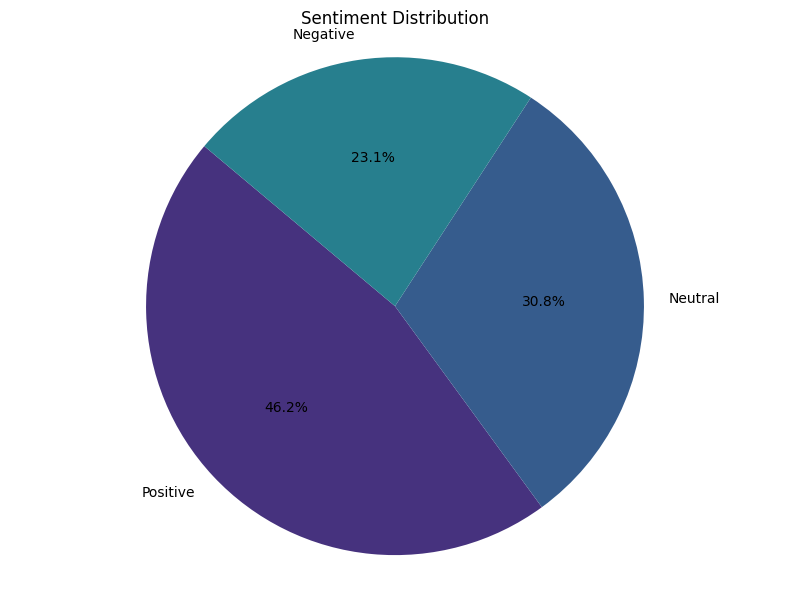

In [47]:
#pie-chart of sentiment
plt.figure(figsize=(8, 6))
plt.pie(df_sentiments['Count'], labels=df_sentiments['Sentiment'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis'))
plt.axis('equal')
plt.title('Sentiment Distribution')
plt.tight_layout()
plt.show()